<a href="https://colab.research.google.com/github/DikshantBadawadagi/Show-Forecasting/blob/main/Prediction%20on%202099.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install numpy matplotlib seaborn plotly seaborn --quiet

In [2]:
!pip install scikit-learn --upgrade --quiet

In [3]:
import os
import matplotlib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
%matplotlib inline

In [4]:
sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (10,6)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

In [ ]:
os.listdir()

['.config', 'dataset.csv', '.ipynb_checkpoints', 'sample_data']

In [5]:
data_df = pd.read_csv('dataset.csv',low_memory = False)

FileNotFoundError: [Errno 2] No such file or directory: 'dataset.csv'

In [7]:
data_df.tail()

,show_id,timestamp,section_id,availability_standard,availability_resale,capacity,event_date,venue_id,event_time_zone
4132880,4884087,2024_06_05T21_16_43,305,2,0,346,2024-06-06 20:00:00.000 Z,22361,America/New_York
4132881,4884087,2024_06_05T21_16_43,201ADA,4,0,4,2024-06-06 20:00:00.000 Z,22361,America/New_York
4132882,4884087,2024_06_05T21_16_43,307ADA,4,0,4,2024-06-06 20:00:00.000 Z,22361,America/New_York
4132883,4884087,2024_06_06T09_16_10,304,2,0,312,2024-06-06 20:00:00.000 Z,22361,America/New_York
4132884,4884087,2024_06_06T09_16_10,207ADA,1,0,4,2024-06-06 20:00:00.000 Z,22361,America/New_York


In [ ]:
data_df.describe()

,show_id,availability_standard,availability_resale,capacity,venue_id
count,4.132885e+06,4.132885e+06,4.132885e+06,4.132885e+06,4.132885e+06
mean,4.829854e+06,1.566541e+02,1.763831e+01,3.659023e+02,1.049756e+04
std,1.499810e+05,9.115976e+02,2.802916e+02,1.188579e+03,9.242035e+03
min,4.217851e+06,0.000000e+00,0.000000e+00,0.000000e+00,9.000000e+00
25%,4.780388e+06,4.000000e+00,0.000000e+00,8.900000e+01,8.680000e+02
50%,4.861385e+06,2.700000e+01,0.000000e+00,2.090000e+02,1.144500e+04
75%,4.934185e+06,1.180000e+02,9.000000e+00,3.510000e+02,2.185300e+04
max,5.060180e+06,8.670400e+04,7.463200e+04,1.000000e+05,2.908400e+04


In [ ]:
data_df.isna().sum()

,0
show_id,0
timestamp,0
section_id,0
availability_standard,0
availability_resale,0
capacity,0
event_date,0
venue_id,0
event_time_zone,0


In [ ]:
data_df.duplicated().sum()

0

In [ ]:
data_df['Date'] = pd.to_datetime(data_df.event_date)

In [ ]:
data_df.Date.min(),data_df.Date.max()

(Timestamp('2024-05-01 18:00:00+0000', tz='UTC'),
 Timestamp('2099-12-07 20:00:00+0000', tz='UTC'))

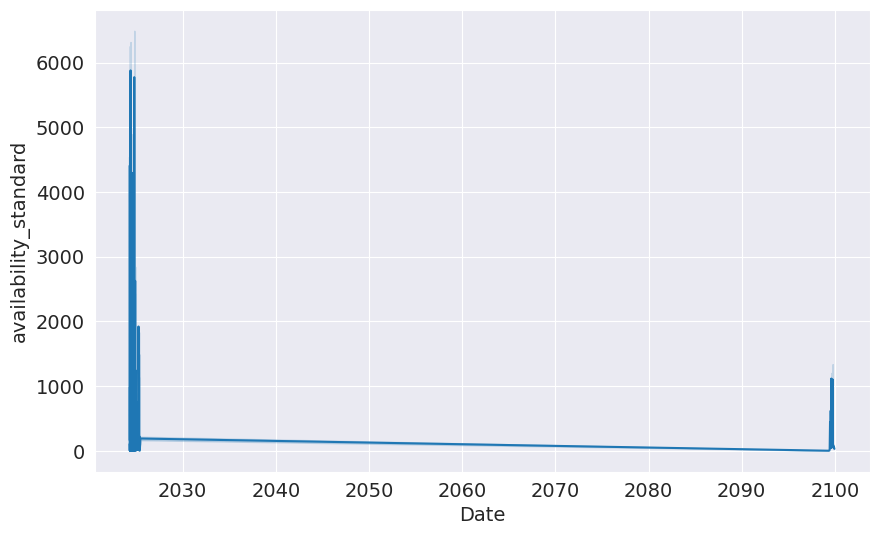

In [ ]:
sns.lineplot(data=data_df, x='Date', y='availability_standard')
plt.show()


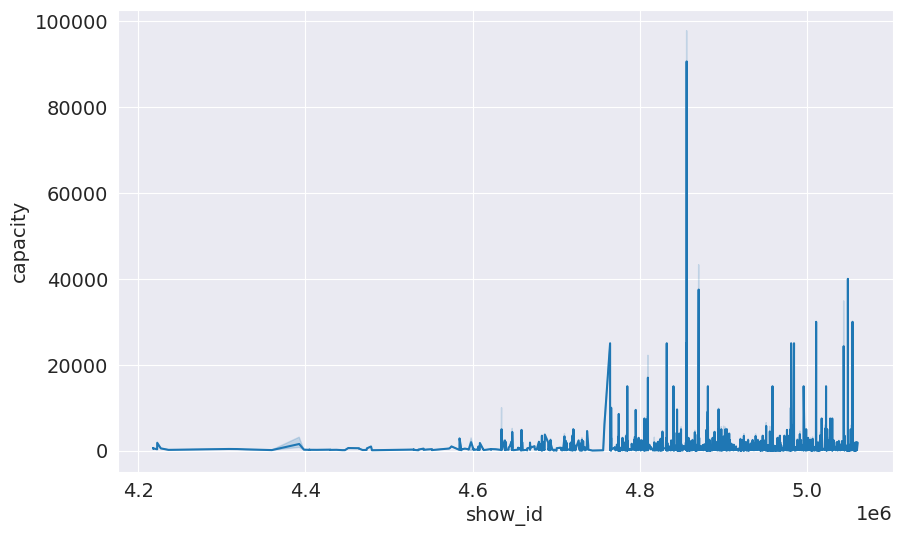

In [ ]:
sns.lineplot(data=data_df,x='show_id',y='capacity')
plt.show()

<Axes: xlabel='Day', ylabel='availability_standard'>

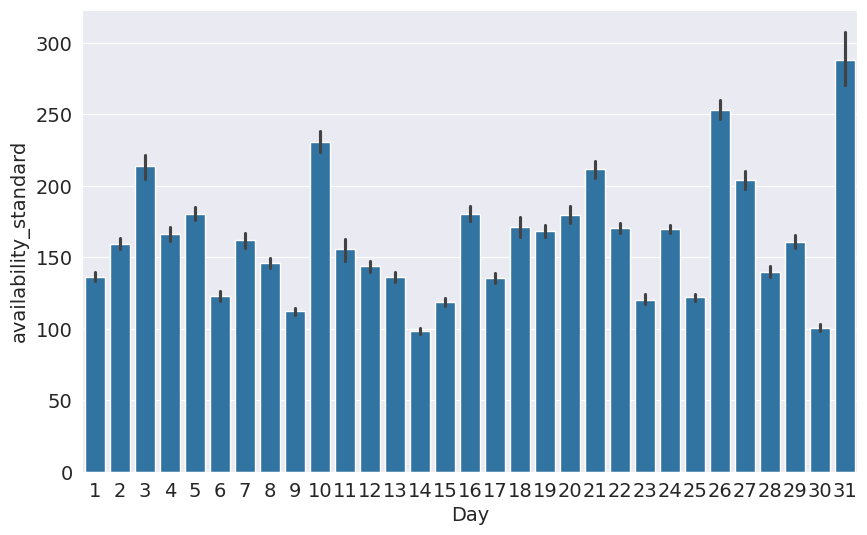

In [ ]:
sns.barplot(data=data_df,x='Day',y='availability_standard')

<Axes: xlabel='Year', ylabel='availability_standard'>

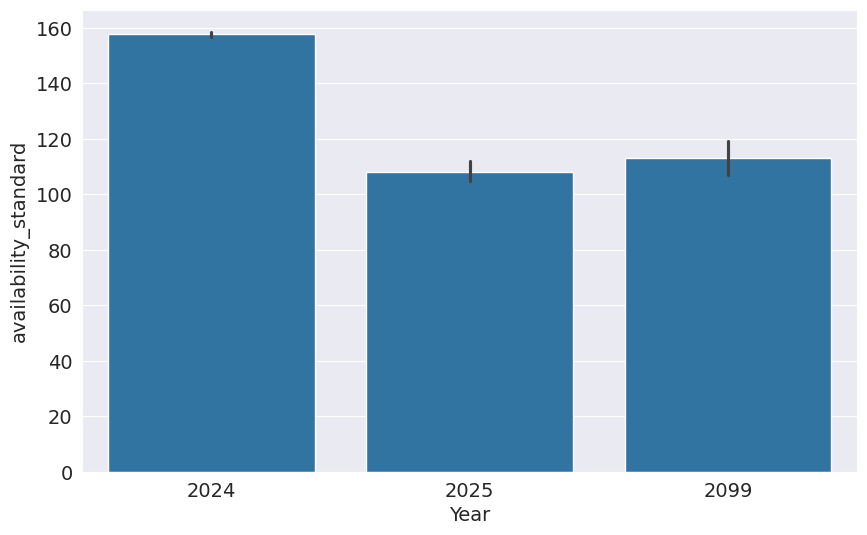

In [ ]:
sns.barplot(data=data_df,x='Year',y='availability_standard')

In [10]:
data_df['Year'].unique()

array([2024, 2025, 2099], dtype=int32)

In [ ]:
data_df['Year'] = data_df['Date'].dt.year
data_df['Month'] = data_df['Date'].dt.month
data_df['Day'] = data_df['Date'].dt.day



<ipython-input-18-5e1a98b7f7bd>:2: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1, 2, 1)
<ipython-input-18-5e1a98b7f7bd>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_df['availability_standard'])


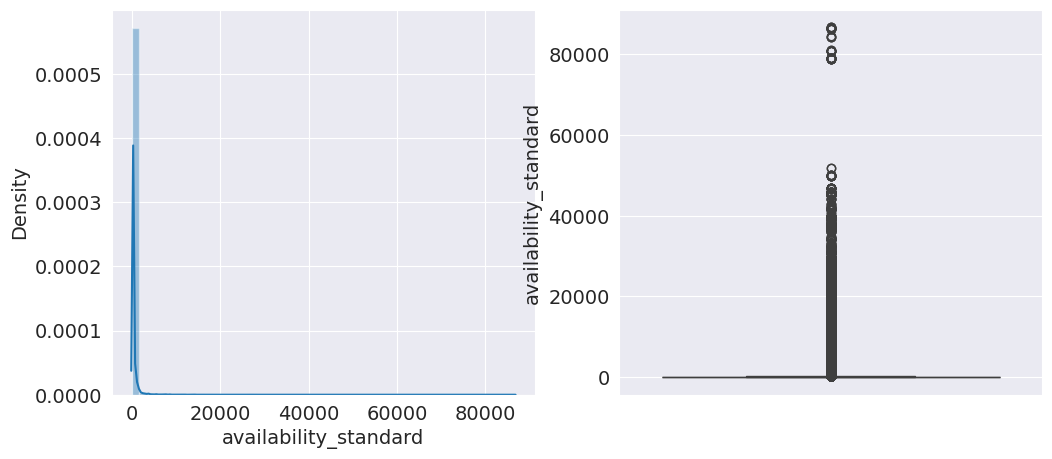

In [ ]:
plt.subplots(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.distplot(data_df['availability_standard'])

plt.subplot(1, 2, 2)
sns.boxplot(data_df['availability_standard'])
plt.show()

In [ ]:
y24_df = data_df[data_df['Year'] == 2024]
y25_df = data_df[data_df['Year'] == 2025]
y99_df = data_df[data_df['Year'] == 2099]

In [19]:
y24_df.to_csv('y24_df.csv')
y25_df.to_csv('y25_df.csv')
y99_df.to_csv('y99_df.csv')

In [17]:
rows = y99_df.shape[0]
rows

56805

<ipython-input-22-c49dd2bcd499>:2: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1, 2, 1)
<ipython-input-22-c49dd2bcd499>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y24_df['availability_standard'])


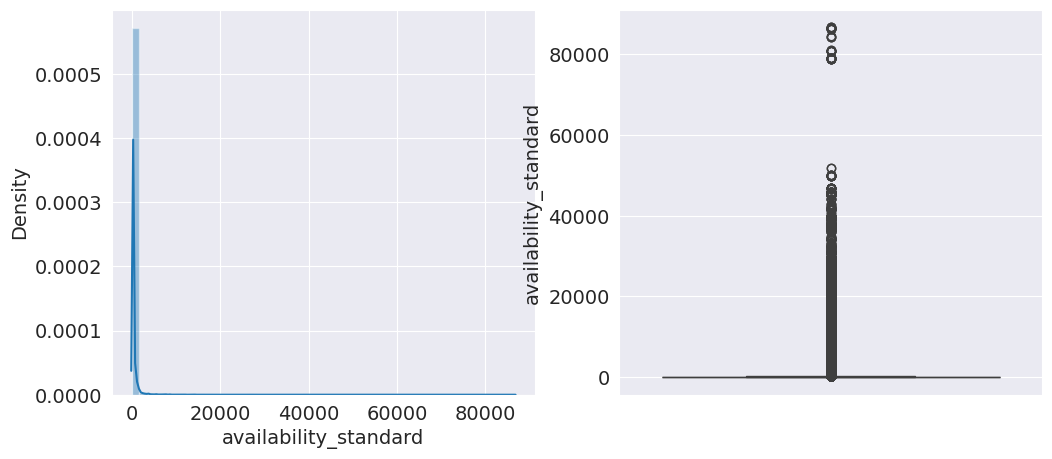

In [ ]:
plt.subplots(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.distplot(y24_df['availability_standard'])

plt.subplot(1, 2, 2)
sns.boxplot(y24_df['availability_standard'])
plt.show()

<Axes: xlabel='Month', ylabel='availability_standard'>

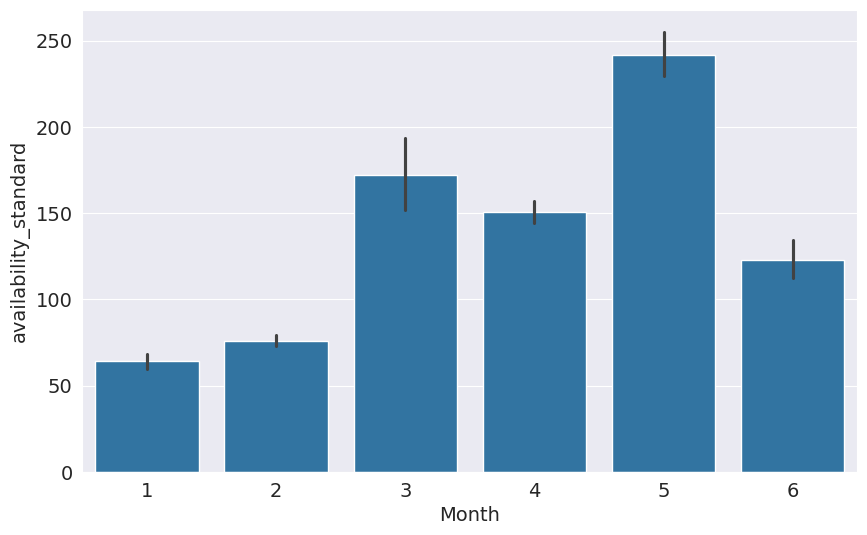

In [18]:
sns.barplot(data=y25_df,x='Month',y='availability_standard')

<Axes: xlabel='Day', ylabel='availability_standard'>

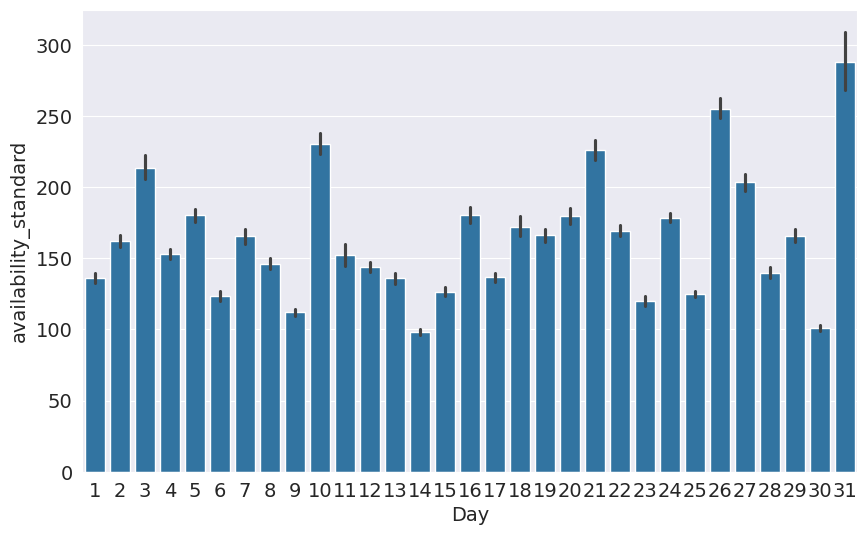

In [ ]:
sns.barplot(data=y24_df,x='Day',y='availability_standard')

<Axes: xlabel='event_time_zone', ylabel='availability_standard'>

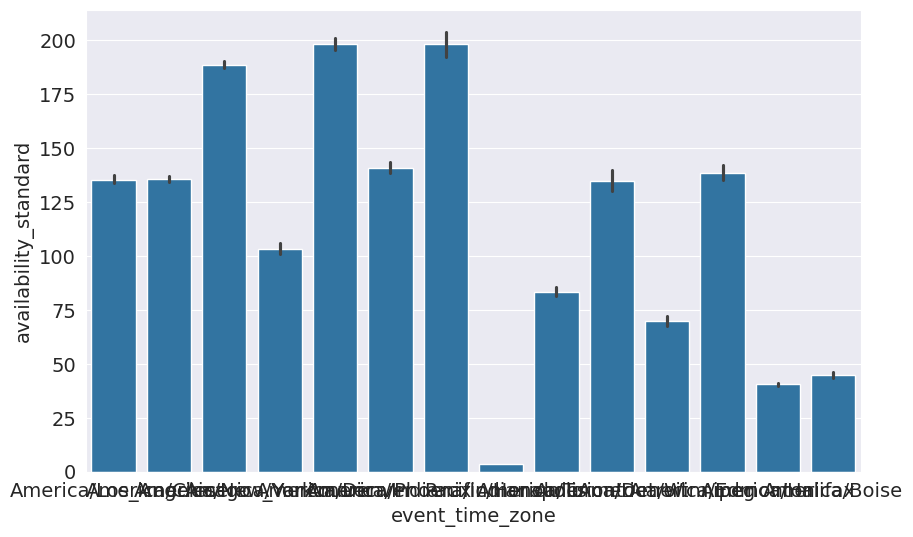

In [ ]:
sns.barplot(data=y24_df,x='event_time_zone',y='availability_standard')

In [ ]:
sns.histplot(data=y24_df,x='section_id',y='availability_standard')

In [ ]:
sns.barplot(x='venue_id', y='Value', hue='Measure', data=df_melted)

In [9]:
y99_df = pd.read_csv('y99_df.csv',low_memory = False)

In [12]:
y99_df.columns

Index(['Unnamed: 0', 'show_id', 'timestamp', 'section_id',
       'availability_standard', 'availability_resale', 'capacity',
       'event_date', 'venue_id', 'event_time_zone', 'Date', 'Year', 'Month',
       'Day'],
      dtype='object')

In [13]:
train_size = int(0.80*len(y99_df))
train_size

45444

In [14]:
sorted_df = y99_df.sort_values('Date')

In [39]:
sorted_df['time'] = sorted_df['timestamp'].str.split('T').str[1]  # Extract time part
sorted_df[['hour', 'minute', 'second']] = sorted_df['time'].str.split('_', expand=True)  # Split time into components

# Convert hour, minute, and second columns to integers
sorted_df['hour'] = sorted_df['hour'].astype(int)
sorted_df['minute'] = sorted_df['minute'].astype(int)
sorted_df['second'] = sorted_df['second'].astype(int)

In [40]:
sorted_df.head()

,Unnamed: 0,show_id,timestamp,section_id,availability_standard,availability_resale,capacity,event_date,venue_id,event_time_zone,Date,Year,Month,Day,time,hour,minute,second
32098,2126636,4784458,2024_05_09T21_08_16,102,0,8,662,2099-05-09 19:00:00.000 Z,11899,America/New_York,2099-05-09 19:00:00+00:00,2099,5,9,21_08_16,21,8,16
32087,2125554,4784458,2024_05_02T09_11_35,102,0,8,662,2099-05-09 19:00:00.000 Z,11899,America/New_York,2099-05-09 19:00:00+00:00,2099,5,9,09_11_35,9,11,35
32088,2125555,4784458,2024_05_05T09_11_25,102,0,6,662,2099-05-09 19:00:00.000 Z,11899,America/New_York,2099-05-09 19:00:00+00:00,2099,5,9,09_11_25,9,11,25
32089,2125600,4784458,2024_05_04T21_11_20,102,0,6,662,2099-05-09 19:00:00.000 Z,11899,America/New_York,2099-05-09 19:00:00+00:00,2099,5,9,21_11_20,21,11,20
32090,2125601,4784458,2024_05_06T21_11_53,102,0,8,662,2099-05-09 19:00:00.000 Z,11899,America/New_York,2099-05-09 19:00:00+00:00,2099,5,9,21_11_53,21,11,53


In [41]:
train_df,val_df = sorted_df[:train_size],sorted_df[train_size:]

In [42]:
train_df.head()

,Unnamed: 0,show_id,timestamp,section_id,availability_standard,availability_resale,capacity,event_date,venue_id,event_time_zone,Date,Year,Month,Day,time,hour,minute,second
32098,2126636,4784458,2024_05_09T21_08_16,102,0,8,662,2099-05-09 19:00:00.000 Z,11899,America/New_York,2099-05-09 19:00:00+00:00,2099,5,9,21_08_16,21,8,16
32087,2125554,4784458,2024_05_02T09_11_35,102,0,8,662,2099-05-09 19:00:00.000 Z,11899,America/New_York,2099-05-09 19:00:00+00:00,2099,5,9,09_11_35,9,11,35
32088,2125555,4784458,2024_05_05T09_11_25,102,0,6,662,2099-05-09 19:00:00.000 Z,11899,America/New_York,2099-05-09 19:00:00+00:00,2099,5,9,09_11_25,9,11,25
32089,2125600,4784458,2024_05_04T21_11_20,102,0,6,662,2099-05-09 19:00:00.000 Z,11899,America/New_York,2099-05-09 19:00:00+00:00,2099,5,9,21_11_20,21,11,20
32090,2125601,4784458,2024_05_06T21_11_53,102,0,8,662,2099-05-09 19:00:00.000 Z,11899,America/New_York,2099-05-09 19:00:00+00:00,2099,5,9,21_11_53,21,11,53


In [43]:
train_df.Date.min,train_df.Date.max

(<bound method Series.min of 32098    2099-05-09 19:00:00+00:00
 32087    2099-05-09 19:00:00+00:00
 32088    2099-05-09 19:00:00+00:00
 32089    2099-05-09 19:00:00+00:00
 32090    2099-05-09 19:00:00+00:00
                    ...            
 21079    2099-11-21 20:00:00+00:00
 21078    2099-11-21 20:00:00+00:00
 21077    2099-11-21 20:00:00+00:00
 21076    2099-11-21 20:00:00+00:00
 21075    2099-11-21 20:00:00+00:00
 Name: Date, Length: 45444, dtype: object>,
 <bound method Series.max of 32098    2099-05-09 19:00:00+00:00
 32087    2099-05-09 19:00:00+00:00
 32088    2099-05-09 19:00:00+00:00
 32089    2099-05-09 19:00:00+00:00
 32090    2099-05-09 19:00:00+00:00
                    ...            
 21079    2099-11-21 20:00:00+00:00
 21078    2099-11-21 20:00:00+00:00
 21077    2099-11-21 20:00:00+00:00
 21076    2099-11-21 20:00:00+00:00
 21075    2099-11-21 20:00:00+00:00
 Name: Date, Length: 45444, dtype: object>)

In [44]:
train_df.columns

Index(['Unnamed: 0', 'show_id', 'timestamp', 'section_id',
       'availability_standard', 'availability_resale', 'capacity',
       'event_date', 'venue_id', 'event_time_zone', 'Date', 'Year', 'Month',
       'Day', 'time', 'hour', 'minute', 'second'],
      dtype='object')

In [45]:
input_cols = ['show_id', 'hour', 'minute', 'second', 'section_id',
        'availability_resale', 'capacity',
        'venue_id', 'event_time_zone', 'Year', 'Month',
       'Day']
target_cols = 'availability_standard'

In [46]:
train_df[input_cols].nunique()

,0
show_id,18
hour,17
minute,53
second,60
section_id,184
availability_resale,192
capacity,217
venue_id,18
event_time_zone,5
Year,1


In [47]:
train_inputs = train_df[input_cols].copy()
train_targets = train_df[target_cols].copy()

In [48]:
val_inputs = val_df[input_cols].copy()
val_targets = val_df[target_cols].copy()

In [67]:
numeric_cols = ['hour', 'minute', 'second',
        'availability_resale', 'capacity', 'Year', 'Month',
       'Day']

categorical_cols = ['show_id','section_id','venue_id', 'event_time_zone']

In [50]:
from sklearn.preprocessing import OneHotEncoder

In [51]:
encoder = OneHotEncoder(sparse_output=False,handle_unknown='ignore')
encoder.fit(train_inputs[categorical_cols])
encoded_cols = list(encoder.get_feature_names_out(categorical_cols))

In [52]:
train_inputs[encoded_cols] = encoder.transform(train_inputs[categorical_cols])
val_inputs[encoded_cols] = encoder.transform(val_inputs[categorical_cols])

<ipython-input-52-562c4d1efa09>:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  train_inputs[encoded_cols] = encoder.transform(train_inputs[categorical_cols])
<ipython-input-52-562c4d1efa09>:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  train_inputs[encoded_cols] = encoder.transform(train_inputs[categorical_cols])
<ipython-input-52-562c4d1efa09>:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at 

In [68]:
X_train = train_inputs[numeric_cols + encoded_cols]
X_val = val_inputs[numeric_cols + encoded_cols]

In [69]:
def return_mean(inputs):
  return np.full(len(inputs),sorted_df['availability_standard'].mean())

In [70]:
train_preds = return_mean(X_train)

In [71]:
train_preds

array([112.97042514, 112.97042514, 112.97042514, ..., 112.97042514,
       112.97042514, 112.97042514])

In [72]:
from sklearn.metrics import mean_squared_error

In [73]:
mean_squared_error(train_preds,train_targets,squared=False)

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


790.0617052716614

In [74]:
mean_squared_error(return_mean(X_val),val_targets,squared=False)

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


94.64411075522828

In [75]:
from sklearn.linear_model import LinearRegression

In [76]:
linreg = LinearRegression()

In [77]:
linreg.fit(X_train,train_targets)

LinearRegression()

In [78]:
train_preds = linreg.predict(X_train)
train_preds

array([  9.78125  ,   1.953125 ,   0.3984375, ..., 142.3046875,
        56.1953125,  43.578125 ])

In [79]:
mean_squared_error(train_preds,train_targets,squared=False)

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


511.406495366694

In [80]:
val_preds = linreg.predict(X_val)
val_preds

array([ 1.28203125e+02,  3.82656250e+01,  4.74140625e+01, ...,
       -3.87388164e+10, -3.87388165e+10, -3.87388165e+10])

In [81]:
mean_squared_error(val_preds,val_targets,squared=False)

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


25311190297.002296

In [85]:
def try_model(model):
  model.fit(X_train,train_targets)

  train_preds = model.predict(X_train)
  val_preds = model.predict(X_val)

  train_rmse = mean_squared_error(train_targets,train_preds,squared=False)
  val_rmse = mean_squared_error(val_targets,val_preds,squared=False)

  return train_rmse,val_rmse

In [87]:
from  sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet, SGDRegressor

In [88]:
try_model(Ridge())

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


(511.4733870768293, 1239.4512070934961)

In [89]:
try_model(Lasso())

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


(520.8189453605916, 61.19165644497117)

In [90]:
try_model(ElasticNet())

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


(700.4753894913041, 113.50341273328083)

In [91]:
try_model(SGDRegressor())

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


(836977555287665.0, 526136574968199.44)

In [82]:
from sklearn.tree import DecisionTreeRegressor, plot_tree

In [86]:
tree = DecisionTreeRegressor(random_state=42)
try_model(tree)

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


(8.311001346195495, 150.66066983971612)

[Text(0.5, 0.9, 'capacity <= 3656.5\nsquared_error = 623867.429\nsamples = 45444\nvalue = 131.138'),
 Text(0.25, 0.7, 'capacity <= 729.5\nsquared_error = 17347.291\nsamples = 44958\nvalue = 84.492'),
 Text(0.375, 0.8, 'True  '),
 Text(0.125, 0.5, 'capacity <= 158.5\nsquared_error = 9124.438\nsamples = 43731\nvalue = 73.979'),
 Text(0.0625, 0.3, 'capacity <= 106.0\nsquared_error = 563.577\nsamples = 13505\nvalue = 22.076'),
 Text(0.03125, 0.1, '\n  (...)  \n'),
 Text(0.09375, 0.1, '\n  (...)  \n'),
 Text(0.1875, 0.3, 'show_id_4973188 <= 0.5\nsquared_error = 11208.022\nsamples = 30226\nvalue = 97.169'),
 Text(0.15625, 0.1, '\n  (...)  \n'),
 Text(0.21875, 0.1, '\n  (...)  \n'),
 Text(0.375, 0.5, 'availability_resale <= 72.0\nsquared_error = 166084.107\nsamples = 1227\nvalue = 459.18'),
 Text(0.3125, 0.3, 'minute <= 6.5\nsquared_error = 177705.372\nsamples = 867\nvalue = 580.253'),
 Text(0.28125, 0.1, '\n  (...)  \n'),
 Text(0.34375, 0.1, '\n  (...)  \n'),
 Text(0.4375, 0.3, 'event_time_z

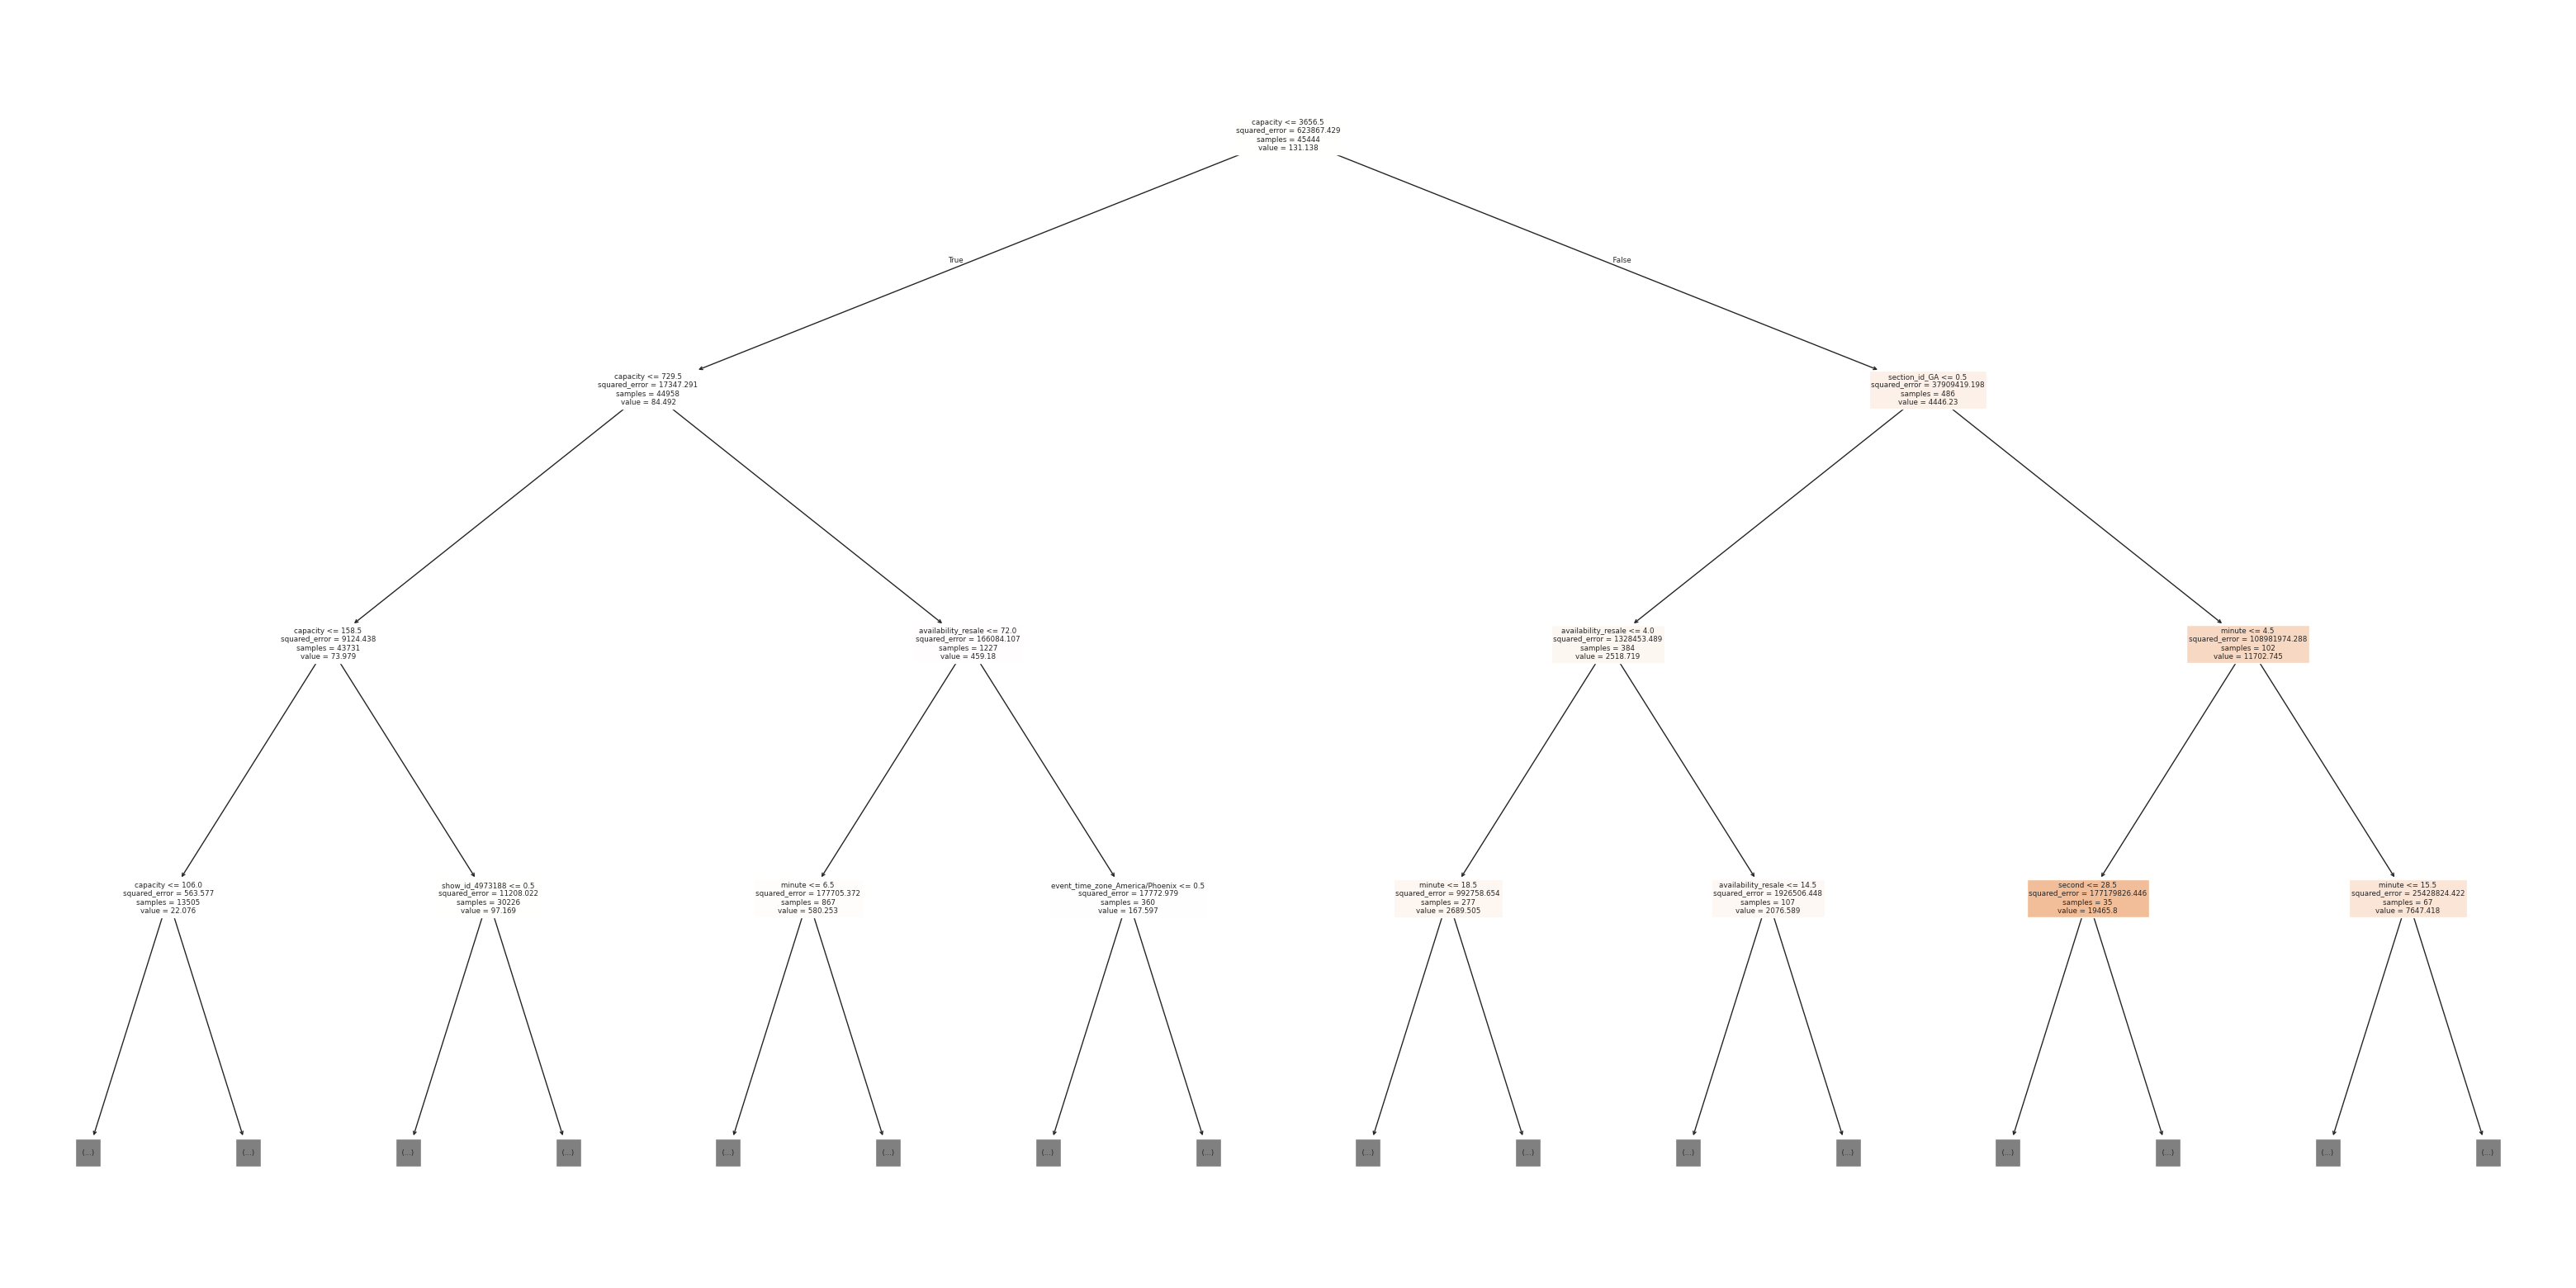

In [92]:
plt.figure(figsize=(40,20))
plot_tree(tree,max_depth=3,filled=True, feature_names=numeric_cols+encoded_cols)

In [93]:
from sklearn.ensemble import RandomForestRegressor

In [94]:
%%time
rf= RandomForestRegressor(random_state=42,n_jobs=-1,n_estimators=20)
try_model(rf)

CPU times: user 14.1 s, sys: 119 ms, total: 14.2 s
Wall time: 10.4 s


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


(168.5874182118665, 35.138732734853974)

In [95]:
rf.feature_importances_

array([5.32839474e-02, 1.51289143e-01, 2.04523630e-01, 8.65884518e-03,
       3.36018054e-01, 0.00000000e+00, 4.74685026e-02, 4.67457600e-02,
       8.05057937e-06, 1.12216899e-05, 3.22798140e-04, 5.30288816e-07,
       2.63220245e-07, 9.29408365e-06, 9.61589053e-06, 3.92296858e-05,
       1.21437983e-05, 5.76760388e-06, 7.86209688e-06, 6.74044873e-07,
       7.58584873e-07, 5.88131981e-06, 1.55196315e-03, 3.02014931e-04,
       3.58307754e-05, 1.25849894e-02, 1.16652302e-05, 2.18516321e-04,
       0.00000000e+00, 2.08528456e-04, 2.47037579e-04, 4.72520643e-12,
       4.50825289e-05, 8.97304277e-05, 4.44561130e-08, 6.62445072e-05,
       4.96573436e-05, 1.94586313e-06, 1.12029423e-04, 1.62777974e-05,
       9.29245631e-05, 9.62819685e-05, 1.10889296e-05, 5.17994121e-07,
       4.39181386e-05, 0.00000000e+00, 4.77530348e-06, 3.69528489e-06,
       4.35434588e-06, 1.93091761e-05, 5.78482292e-06, 6.39670172e-05,
       1.01470942e-04, 6.59388636e-06, 1.35372558e-05, 2.13315850e-07,
      

In [97]:
train_preds = rf.predict(X_train)
train_preds

array([  0. ,   0. ,   0. , ..., 123.7,  34.9,  20. ])

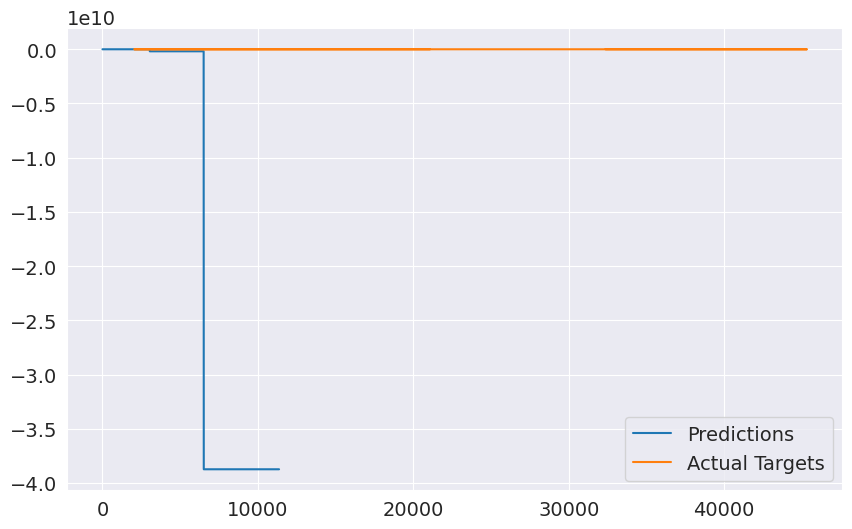

In [109]:
plt.plot(val_preds, label='Predictions')
plt.plot(val_targets, label='Actual Targets')
plt.legend()

In [107]:
train_targets.min(),train_targets.max()

(0, 37702)

In [111]:
val_targets.tail()

,availability_standard
33806,13
33805,26
33804,84
33802,29
32363,37


<Axes: ylabel='availability_standard'>

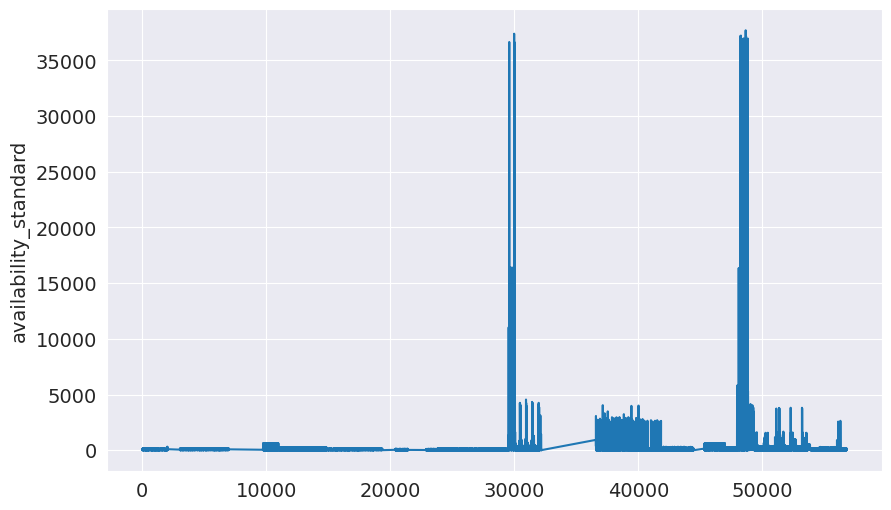

In [105]:
sns.lineplot(data=train_targets)